## Topics covered in this notebook

1. Create a demo dataset - grouped and ungrouped.
2. Methods to calculate bin count.
3. Graphical representation of frequency distribution.
4. A brief on measures of central tendency.
5. Mean and composite mean calculation for both data sets.
6. Median calculation for both data sets.
7. Function to calculate mode.
8. A brief on measures of dispersion.
9. Function to calculate Range.
10. Function to calculate Quatile deviation.
11. Function to calculate Mean deviation.
12. Function to calculate Standard deviation.
13. Coefficients of dispersion

## Create demo dataset of both grouped and un grouped type

In [4]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Creating a sample dataset 
# Consider this as a employee serial number and corresponding age

sl_no = list(range(1,11))
age = np.random.randint(25,60,10)

print("Employee serial number list",sl_no)
print("Employee age list",age)

# Creating a dataframe from the above two lists
data = pd.DataFrame()
data['sl_no'] = sl_no
data['age'] = age

print(data)

Employee serial number list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Employee age list [54 28 29 33 51 48 40 59 42 28]
   sl_no  age
0      1   54
1      2   28
2      3   29
3      4   33
4      5   51
5      6   48
6      7   40
7      8   59
8      9   42
9     10   28


In [6]:
# Creating a sample grouped data
# Consider this as age range and corresponding salary

def create_bins(lower_bound, width, count):

    bins = []
    for low in range(lower_bound, 
                    lower_bound + count*width + 1, width):
        bins.append((low, low+width))
    return bins

bins = create_bins(lower_bound = 20,
                    width = 5,
                    count = 9)


salary = np.random.randint(25000,100000,10)

print("Employee age range",bins)
print("Emplyee salary range",salary)

Employee age range [(20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 55), (55, 60), (60, 65), (65, 70)]
Emplyee salary range [60288 57476 74450 64987 65759 75933 94312 91381 40358 58780]


In [7]:
# Creating dataframe from the above two lists using dictionary method
# Create a dictionary of the two lists above; using dictionary comprehension

grp_data = {bins[i]: salary[i] for i in range(len(bins))}
grouped_data = pd.DataFrame(grp_data.items(), columns=['age','salary'])

print(grouped_data)

        age  salary
0  (20, 25)   60288
1  (25, 30)   57476
2  (30, 35)   74450
3  (35, 40)   64987
4  (40, 45)   65759
5  (45, 50)   75933
6  (50, 55)   94312
7  (55, 60)   91381
8  (60, 65)   40358
9  (65, 70)   58780


## Find the optimal bin size for a dataset

In [8]:
# Sample frequency table with n observations 

def sample (no_of_observations):
    x = list(range(1,no_of_observations+1))
    freq = np.random.randint(1,100,no_of_observations)
    sample = {x[i]: freq[i] for i in range(len(x))}
    sample_df = pd.DataFrame(sample.items(), columns=['x', 'freq'])
    return sample_df

sample_df = sample(no_of_observations=100)    
sample_df.head(5)

,x,freq
0,1,71
1,2,61
2,3,35
3,4,74
4,5,50


In [9]:
# Sample dataset with class intervals and n observations
def sample_2 (no_of_observations):
    bins = create_bins(lower_bound=0, width=5, count=no_of_observations)
    freq = np.random.randint(20, 100,no_of_observations+1)
    sample_2 = {bins[i]:freq[i] for i in range(len(bins))}
    sample_2 = pd.DataFrame(sample_2.items(), columns=['class_interval', 'freq'])
    return sample_2

sample_df2 = sample_2(no_of_observations=10)
sample_df2.head(5)

,class_interval,freq
0,"(0, 5)",64
1,"(5, 10)",40
2,"(10, 15)",59
3,"(15, 20)",42
4,"(20, 25)",64


### Method 1 : Sturge's Formula 

The formula states that the optimal number of bins for a given dataset with n observations is given by 
> K= 1 + 3. 322 logN

where:
* K = number of class intervals (bins).
* N = number of observations in the set.
* log = logarithm of the number.


1. Sturge’s rule works best for continuous data that is normally distributed and symmetrical. 
2. It helps us to convert this data into discrete, symmetric, binomial classes. 
3. As long as your data is not skewed, using Sturge’s rule should give you a nice-looking, easy to read histogram that represents the data well.
4. What Sturge’s rule is not much good for is severely skewed, non symmetric data sets, or for an extremely large number of observations. Here you’ll want to use one of the many available alternatives.

Text(0.5, 1.0, 'bins = 13')

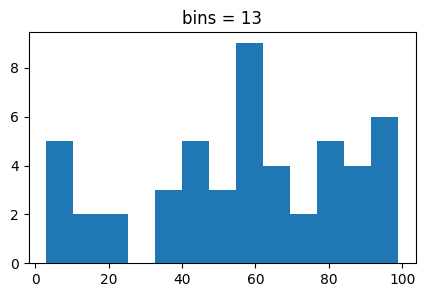

In [10]:
no_of_observations = 50
dist =  sample(no_of_observations)
bin_count = int(1 + 3.322*(np.log(no_of_observations)))

fig = plt.figure(figsize=(5,3))
plt.hist(x=dist['freq'],bins=bin_count)
plt.title(f'bins = {bin_count}')

### Method 2 : Freedman-Diaconis Rule

It considers the sample size as well as the spread of the sample.

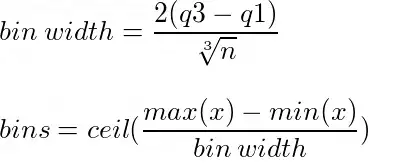

where,
* q3 is the third quartile.
* q1 is the first quartile.
* n stands for sample size.
* ceil() method rounds a number UP to the nearest integer

Text(0.5, 1.0, 'bins = 26')

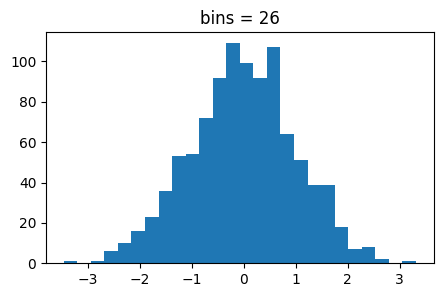

In [11]:
np.random.seed(11)                              # get the same random numbers always
norm_dist = pd.Series(np.random.randn(1000))    # get a random normal distribution
q1 = norm_dist.quantile(0.25)
q3 = norm_dist.quantile(0.75)
iqr = q3-q1
bin_width = (2*iqr)/(len(norm_dist)**(1/3))
bin_count = int(np.ceil((norm_dist.max() - norm_dist.min())/(bin_width)))

fig = plt.figure(figsize = (5,3))
plt.hist(x=norm_dist, bins=bin_count)
plt.title(f'bins = {bin_count}')

# Measures of central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within the dataset.

## Recall the datasets

In [12]:
# Recalling the two datasets we created

display(data.head(5))
display(grouped_data.head(5))

,sl_no,age
0,1,54
1,2,28
2,3,29
3,4,33
4,5,51


,age,salary
0,"(20, 25)",60288
1,"(25, 30)",57476
2,"(30, 35)",74450
3,"(35, 40)",64987
4,"(40, 45)",65759


## Mean of a dataset
It represents the average of the given dataset

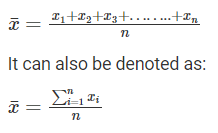

### Mean calculation for discrete ungrouped data

In [13]:
data.info()
display(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sl_no   10 non-null     int64
 1   age     10 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 248.0 bytes


,sl_no,age
0,1,54
1,2,28
2,3,29
3,4,33
4,5,51


#### Using python mean() function

In [14]:
from statistics import mean

In [15]:
mean_1 = mean(data['age'])
print("Average age is", mean_1)

Average age is 41.2


#### Using python sum() function

In [16]:
sum_data = sum(data['age'])
mean_2 = sum_data/len(data['age'])
print("Average age is", mean_2)

Average age is 41.2


#### Using reduce() and lambda method

In [17]:
from functools import reduce

In [18]:
'''
Syntax of reduce and lambda functions
Reduce : reduce(function, input_list/sequence)
Lambda : lambda arguments:function
'''

mean_3 = reduce(lambda x,y : x+y, data['age']) / len(data['age'])
print("Average age is", mean_3)

Average age is 41.2


#### Using reduce() and add operator

In [19]:
import operator

In [20]:
mean_4 = reduce(operator.add, data['age']) / len(data['age'])
print("Average age is", mean_4)

Average age is 41.2


#### Using NumPy average() function

In [21]:
mean_5 = np.average(data['age'])
print("Average age is", mean_5)
print("Average age rounded till 3 decimals:", round(mean_5,3))

Average age is 41.2
Average age rounded till 3 decimals: 41.2


## Mean of frequency table - discrete and grouped

In [22]:
ungrouped_freq_table = sample(no_of_observations=50)
print("Sample discrete frequency table:\n")
display(ungrouped_freq_table.head(5))

grouped_freq_table = sample_2(no_of_observations=50)
print("Sample frequency table with class intervals:\n")
display(grouped_freq_table.head(5))


Sample discrete frequency table:



,x,freq
0,1,37
1,2,53
2,3,89
3,4,46
4,5,73


Sample frequency table with class intervals:



,class_interval,freq
0,"(0, 5)",99
1,"(5, 10)",68
2,"(10, 15)",85
3,"(15, 20)",24
4,"(20, 25)",69


In [23]:
# Mean of a frequency df is done by calculating mean of the product of observation and frequency
ungrouped_freq_table['fixi'] = ungrouped_freq_table['x'] * ungrouped_freq_table['freq']
ungrouped_freq_table.head(5)

,x,freq,fixi
0,1,37,37
1,2,53,106
2,3,89,267
3,4,46,184
4,5,73,365


In [24]:
ungrouped_freq_table_mean = np.average(ungrouped_freq_table['fixi'])
print("Mean of ungrpouped frequency table is ", ungrouped_freq_table_mean)

Mean of ungrpouped frequency table is  1365.32


In [25]:
# For frequency table with class intervals, class midpoint is multiplied with frequency and then mean is calculated
grouped_freq_table[['low','high']] = grouped_freq_table['class_interval'].apply(pd.Series)
grouped_freq_table['xi'] = (grouped_freq_table['high'] - grouped_freq_table['low'])/2
grouped_freq_table['fixi'] = grouped_freq_table['xi']*grouped_freq_table['freq']
grouped_freq_table.head(5)

,class_interval,freq,low,high,xi,fixi
0,"(0, 5)",99,0,5,2.5,247.5
1,"(5, 10)",68,5,10,2.5,170.0
2,"(10, 15)",85,10,15,2.5,212.5
3,"(15, 20)",24,15,20,2.5,60.0
4,"(20, 25)",69,20,25,2.5,172.5


In [26]:
grouped_freq_table_mean = np.average(grouped_freq_table['fixi'])
print("Mean of grpouped frequency table is ", grouped_freq_table_mean)

Mean of grpouped frequency table is  132.7450980392157


## Composite Mean calculation

In [27]:
## code here

## Median of a dataset

Median is the middle value of an ascending or descending list.
1. Sort the list in ascending or descending order
2. The middle value of this sorted list is the median of the list

* If the list contains even numbers of items
    * sum the two numbers in the middle
    * the division of the sum by 2 will give you the median of the list

#### Median for a even numbered list using math library

In [28]:
import math

In [29]:
lst_1 = list(data['age'])
lst_1.sort()                #step1 is to sort the list elements
first_ind = math.floor(len(lst_1)/2)    #floor is rounds a number DOWN to the nearest integer
# print(first_ind)
second_ind = math.floor((len(lst_1)/2)-1)
# print(second_ind)
median_lst1 = (lst_1[first_ind] + lst_1[second_ind])/2
print("Median of the age is", median_lst1)

Median of the age is 41.0


#### Median of a odd numbered list using math library

In [30]:
new_data = data[0:9]

In [31]:
lst_2 = list(new_data['age'])
lst_2.sort()
middle_ind = math.floor(len(lst_2)/2)
median_lst2 = lst_2[middle_ind]
print("Median of the age is", median_lst2)

Median of the age is 42


#### Median using python statistics library

In [32]:
from statistics import median

In [33]:
median2_lst1 = median(lst_1)
median2_lst2 = median(lst_2)
print("Median of even list", median2_lst1)
print("Median of odd list", median2_lst2)

Median of even list 41.0
Median of odd list 42


#### Median using NumPy library

In [34]:
median3_lst1 = np.median(lst_1)
median3_lst2 = np.median(lst_2)
print("Median of even list", median3_lst1)
print("Median of odd list", median3_lst2)

Median of even list 41.0
Median of odd list 42.0


#### Python function to calculate median of a list

In [35]:
def median_list(lst):
    sorted_list = sorted(lst)
    lstlen = len(lst)
    index = (lstlen - 1) // 2

    if (lstlen % 2):
        return sorted_list[index]
    
    else:
        return (sorted_list[index] + sorted_list[index+1])/2.0

print(median_list(lst_1))
print(median_list(lst_2))


41.0
42


#### Python function to calculate median of an array

In [36]:
array1 = np.array(lst_1)
array2 = np.array(lst_2)

def median_array(array):
    array = sorted(array)
    half, odd = divmod(len(array), 2)
    if odd:
        return array[half]
    return (array[half - 1] + array[half]) / 2.0

print(median_array(array1))
print(median_array(array2))

41.0
42


## Median of frequency table - discrete and grouped

## Mode of a dataset

## Mode of frequency table - discrete and grouped

# Measures of dispersion
The measures of dispersion help to interpret the variability of the data i.e. to know how much homogeneous or heterogeneous the data is, how squeezed or scattered the data is.

## Absolute Measures of Dispersion
An absolute measure of dispersion contains the same unit as the original data set. The absolute dispersion method expresses the variations in terms of the average of deviations of observations like standard or means deviations. 

In [37]:
## Data for dispersion calculation
sample = list(data['age'])
sample

[54, 28, 29, 33, 51, 48, 40, 59, 42, 28]

### Range 
Difference between maximum value and the minimum value given in a dataset

In [38]:
def range(lst):
    maximum = max(lst)
    minimum = min(lst)
    return maximum - minimum

range_sample = range(sample)
print("Range of the sample is",range_sample)

Range of the sample is 31


### Variance
Informally, variance estimates how far a set of numbers (random) are spread out from their mean value.

In [39]:
def variance(lst):
    n = len(lst)
    mean = sum(lst)/n
    deviations = [(x - mean)**2 for x in lst]
    variance = sum(deviations)/(n-1)            # Use (n-1) when sample dataset and n in case of population
    return variance

var_sample = variance(sample)
print("Variance of the sample is",var_sample)

# Alternatively
import statistics

var2_sample = statistics.variance(sample)
print("Variance of the sample is",var2_sample)

Variance of the sample is 132.1777777777778
Variance of the sample is 132.17777777777778


### Standard deviation
Measure of how spread out the data is.The standard deviation measures the amount of variation or dispersion of a set of numeric values.

In [40]:
def stdev(data):
    var = variance(data)
    std_dev = var**(1/2)
    return std_dev

standard_deviation = stdev(sample)
print("Standard devaition of the sample is", standard_deviation)

#Alternatively
std_dev = statistics.stdev(sample)
print("Standard devaition of the sample is", std_dev)

Standard devaition of the sample is 11.496859474559903
Standard devaition of the sample is 11.496859474559901


### Quartile deviation
The quartiles are values that divide a list of numbers into quarters. The quartile deviation is half of the distance between the third and the first quartile.

In [50]:
def iqr(data):
    data = sorted(data)
    n = len(data)
    q1 = median(data[:n//2])        # median of the first half
    q3 = median(data[(n+1)//2:])    # median of the second half
    return q3-q1

quartile_dev = iqr(sample)/2
print("Quartile deviation of the data is", quartile_dev)


#Alternatively,
Q1 = np.quantile(sample, 0.25)
Q2 = np.quantile(sample, 0.50)
Q3 = np.quantile(sample, 0.75)

print("Quartile 1 : ", Q1)
print("Quartile 2 : ", Q2)
print("Quartile 3 : ", Q3)

def QuartileDeviation(a, b):
    return (a - b)/2
print(QuartileDeviation(Q3, Q1))

Quartile deviation of the data is 11.0
Quartile 1 :  30.0
Quartile 2 :  41.0
Quartile 3 :  50.25
10.125


### Mean deviation
The average of numbers is known as the mean and the arithmetic mean of the absolute deviations of the observations from a measure of central tendency is known as the mean deviation.

In [52]:
def mad(data):
    avg = mean(data)
    mad = mean([abs(num - avg) for num in data])
    return mad

mean_abs_dev = mad(sample)
print("Mean Absolute Deviation of the sample is", mean_abs_dev)

Mean Absolute Deviation of the sample is 9.6


## Relative Measures of Dispersion
The relative measures of dispersion are used to compare the distribution of two or more data sets.This measure compares value without units.

### Co-efficient of Range

### Co-efficient of  Variance

### Co-efficient of Standard deviation

### Co-efficient of Quartile deviation

### Co-efficient of Mean deviation

In [42]:
def mean_(val, freq):
    return np.average(val, weights = freq)

def median_(val, freq):
    ord = np.argsort(val)
    cdf = np.cumsum(freq[ord])
    return val[ord][np.searchsorted(cdf, cdf[-1] // 2)]

def mode_(val, freq): #in the strictest sense, assuming unique mode
    return val[np.argmax(freq)]

def var_(val, freq):
    avg = mean_(val, freq)
    dev = freq * (val - avg) ** 2
    return dev.sum() / (freq.sum() - 1)

def std_(val, freq):
    return np.sqrt(var_(val, freq))